<a href="https://colab.research.google.com/github/biswajitmohanty/genai/blob/main/Encoder_Decoder_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id=toc></a>
<h1 style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;background-position: 0px 0px;
"><span style='color:white'><b> Machine Translation Using Encoder-Decoder</b></span></h1>

<br>

<center>
    <img src="https://media.geeksforgeeks.org/wp-content/uploads/20231226141038/Machine-Translation-Model.png"
         alt ="Machine Translation"
         style='width: 60%;'>
</center>

## Dataset
The dataset used in this notebook is the '<b>IIT Bombay English-Hindi Translation Dataset</b>'. This Data contains 1,561,840 instances of Hindi - English Translation

<br>

<hr>

<a id=toc></a>
<h1 style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;background-position: 0px 0px;
"><span style='color:white'><b> Encoder Decoder Architecture </b></span></h1>

![Encoder](https://6chaoran.wordpress.com/wp-content/uploads/2019/01/encoder-decoder-architecture.png?w=640)

### Encoder-Decoder Architecture in RNNs:
- **Architecture**:
  - Comprises two RNNs: an Encoder and a Decoder.
  - Encoder processes the input sequence and converts it into a fixed-size context vector.
  - Decoder takes this context vector and generates the output sequence step by step.

- **Encoder**:
  - Takes input sequence one token at a time.
  - Outputs a context vector summarizing the input sequence.
  - Can use various RNN variants like LSTM or GRU.

- **Decoder**:
  - Takes the context vector from the Encoder and generates the output sequence.
  - Processes the output sequence step by step, incorporating information from the context vector.
  - Can have a different architecture from the Encoder, but typically uses the same RNN variant.

- **Training**:
  - During training, both Encoder and Decoder are jointly trained using teacher forcing.
  - Teacher forcing involves providing the correct previous target token as input to the Decoder at each step.

<a id='2'></a>
# 2 | Importing Required Libraries & DataSource

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [1]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 12.1 MB/s eta 0:00:00


In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [3]:
from textblob import Word
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
# Libraray for Data Manipulation
import numpy as np
import pandas as pd

# Libraray for Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library for preprocessing
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import math
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from scipy.sparse import lil_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import pos_tag

# Library for model building
from tensorflow.keras.regularizers import l2
import tensorflow
import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential,Model
#from attention import BahdanauAttention
from keras.layers import SimpleRNN,LSTM,GRU, Embedding, Dense, SpatialDropout1D, Dropout, BatchNormalization, Bidirectional, Attention, Input
from sklearn.metrics import accuracy_score
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam

#Library to overcome Warnings
import warnings
warnings.filterwarnings('ignore')

<a id='1.1'></a>
# Load and Inspect Dataset

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [6]:
data = pd.read_csv('Dataset_English_Hindi.csv')

In [ ]:
data.sample(5)

,English,Hindi
78805,His mothers name was Anandi Devi and his fathe...,उनकी माता का नाम आनन्दी देवी था तथा पिता मुंशी...
112209,Although genetics as a scientific discipline i...,9 आनुवंशिकता और कलऋ-ऊण्श्छ्ष्-टिजेन आनुवंशिकता...
59920,to read people's thoughts and emotions.,लोगों के विचारों और भावनाओं को पढ़ने के लिए।
115623,According to Hindu religion the Chhat Festival...,हिन्दू धर्म में सूर्योपासनाके लिए प्रसिद्ध पर्...
86951,"that, in fact, it was a classic charity run by...","बल्कि, वो एक पारंम्परिक धर्माथ संस्था की तरह ए..."


<a id='3'></a>
# 3 | Data Exploration

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id='3.1'></a>
#### 3.1. Computing Dimension of Dataset

In [7]:
print("dataset shape: ",data.shape)

dataset shape:  (14993, 2)


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> Inference:</font></h3>

* There is total **1561841 records** and **2 columns** availabe in the data.

<a id='3.2'></a>
#### 3.2. Statistical Summary of Dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   English  14993 non-null  object
 1   Hindi    14965 non-null  object
dtypes: object(2)
memory usage: 234.4+ KB


<a id='3.3'></a>
#### 3.3. Checking if There's Any Duplicate Records.

In [9]:
print("Duplicates in Dataset: ",data.duplicated().sum())

Duplicates in Dataset:  127


<a id='3.4'></a>
#### 3.4. Computing Total No. of Missing Values and the Percentage of Missing Values

In [10]:
missing_data = data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(data))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
English,0,0.00
Hindi,28,0.19


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> Inference:</font></h3>

* Some of the Attribute are having Missing Values.  

<a id='3.5'></a>
#### 3.5. Performing Descriptive Analysis

In [11]:
round(data.describe().T,2)

,count,unique,top,freq
English,14993,14611,(Laughter),66
Hindi,14965,14212,(हँसी),26


<a id='4'></a>
# 4 | Preprocessing

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id='4.1'></a>
### **1. Dropping Duplicates and Null Values**

In [12]:
data.drop_duplicates(inplace = True)

In [13]:
data.dropna(inplace = True)

<a id='4.2'></a>
### **2. Lowercasing**

In [14]:
data['English'] = data['English'].str.lower()

<a id='4.3'></a>
### **3. Removing Html tags**

In [15]:
import re
def remove_html_tags(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

In [16]:
data['English'] = data['English'].apply(remove_html_tags)

<a id='4.4'></a>
### **4.  Removing URLs**

In [17]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

data['English'] = data['English'].apply(remove_url)
data['Hindi'] = data['Hindi'].apply(remove_url)

<a id='4.5'></a>
### **5. Chat word treatment**

In [18]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing",
}

In [19]:
def chat_conversion(text):
    new_text=[]
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [20]:
data['English'] = data['English'].apply(chat_conversion)

<a id='4.6'></a>
### **6. Removing Emojis**

In [21]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [22]:
data['English'] = data['English'].apply(remove_emoji)
data['Hindi'] = data['Hindi'].apply(remove_emoji)

<a id='4.7'></a>
### **7. Removing contraction**

In [23]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

data['English'] = data['English'].apply(expand_contractions)

<a id='4.8'></a>
### **8. Remove Non-Hindi and Alphanumeric characters**

In [24]:
def preprocess_text(text, language='english'):
    if not isinstance(text, str):
        return text

    if language == 'english':
        pattern = re.compile(r'[^a-zA-Z0-9\s]')
        return pattern.sub(r'', text)
    elif language == 'hindi':
        pattern = re.compile(r'[^\u0900-\u097F\s]')
        return pattern.sub(r'', text)
    else:
        raise ValueError("Unsupported Language, Supported languages are 'english' and 'hindi'")

data['English'] = data['English'].apply(lambda x: preprocess_text(x, language='english'))
data['Hindi'] = data['Hindi'].apply(lambda x: preprocess_text(x, language='hindi'))

In [25]:
data.sample(5)

,English,Hindi
6664,i am of the opinion that simple talk about ind...,मेरी वह राय है कि स्वतंत्रता के बारे में चर्चा...
4415,you know there is a lot of that out there,आपको पता है कि वहाँ इस तरह की बहुत बातें हैं ।
9923,a really interesting behavior emerges decoration,एक बडा ही रोचक व्यवहार दिखता है सजावट।
12633,it soon becomes playful and active,वह शीघ्र खेलने लगता है और बहुत सक्रिय हो जाता है
10080,it is stated that ramalinga remarked so the go...,कहा जाता है कि रामलिंग ने टिप्पणी करते हुए कहा...


<a id='4.9'></a>
### **9. WordCloud**

In [26]:
# Function to preprocess text and generate word cloud
def generate_wordcloud(text_list, language):
    # Join the list of words into a single string
    text_str = ' '.join(map(str, text_list))

    # Generate word cloud without specifying font path
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_str)

    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {language} Text")
    plt.axis('off')
    plt.show()

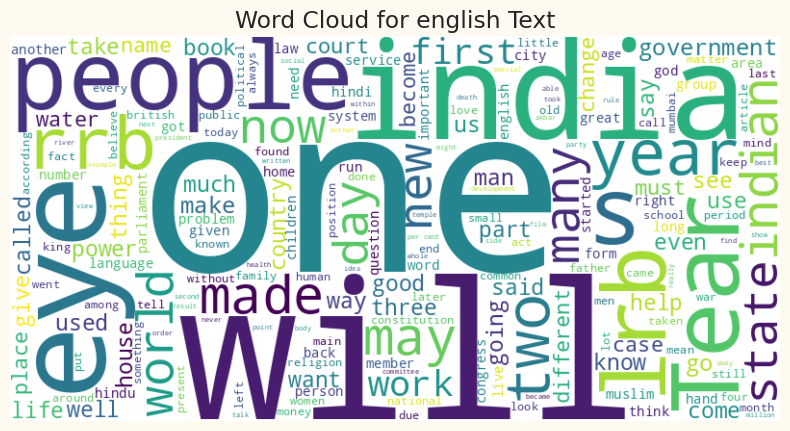

In [27]:
# Generate word clouds for English and Hindi columns
generate_wordcloud(data['English'], 'english')

In [28]:
data.shape

(14838, 2)

In [29]:
data = data[data['English'].str.len() <= 50]

In [30]:
data.shape

(7349, 2)

In [31]:
# Add <start> and <end> tokens to Hindi sentences
data['Hindi'] = ['<start> ' + sentence + ' <end>' for sentence in data['Hindi']]

<a id='4.10'></a>
### **10. Tokenize on the Data**

In [32]:
tok = Tokenizer()
tok.fit_on_texts(data['English'])

In [33]:
tok_hindi = Tokenizer()
tok_hindi.fit_on_texts(data['Hindi'])

In [34]:
len(tok.word_index),len(tok_hindi.word_index)

(6787, 8230)

In [35]:
tok.document_count

7349

#### **Converting data in numerical forms**

In [36]:
data['English'] = tok.texts_to_sequences(data['English'])
data['Hindi'] = tok_hindi.texts_to_sequences(data['Hindi'])

In [37]:
data

,English,Hindi
0,[112],"[1, 3424, 2]"
1,[1096],"[1, 3425, 2]"
2,[1096],"[1, 3426, 2]"
3,[1096],"[1, 3427, 2]"
4,[1821],"[1, 3428, 2]"
...,...,...
14975,"[12, 6784, 34, 6785, 25, 1, 1697, 371]","[1, 123, 8226, 8227, 8228, 820, 4, 801, 53, 2]"
14978,"[885, 61, 6786]","[1, 446, 66, 8229, 2]"
14980,"[61, 5, 1704, 6787]","[1, 274, 16, 1409, 8230, 4, 3, 2]"
14985,"[4, 17, 308, 42, 646, 1243]","[1, 14, 3326, 2606, 9, 61, 25, 47, 33, 2]"


In [38]:
def calculate_max_sequence_length(eng,hindi):
    max_length_combined = max(max(len(seq) for seq in eng), max(len(seq) for seq in hindi))

    return max_length_combined

max_length_combined = calculate_max_sequence_length(data['English'],data['Hindi'])
max_length_combined

43

In [39]:
for num in data['English'][0]:
    print(num, end=' ')

112 

In [40]:
# Print corresponding words horizontally
for num in data['English'][0]:
    word = tok.index_word.get(num, 'UNK')
    print(word, end=' ')

help 

In [41]:
for num in data['Hindi'][0]:
    word = tok_hindi.index_word.get(num)
    print(word,end = " ")

start बचाओ end 

<a id='4.11'></a>
### **11. separating the data in dependent and independent**

In [42]:
hindi = data['Hindi']
english = data['English']

<a id='4.12'></a>
### **12. Padding**

In [43]:
x = pad_sequences(english,maxlen = max_length_combined,padding = 'post')
y = pad_sequences(hindi,maxlen = max_length_combined,padding = 'post')

In [44]:
x

array([[ 112,    0,    0, ...,    0,    0,    0],
       [1096,    0,    0, ...,    0,    0,    0],
       [1096,    0,    0, ...,    0,    0,    0],
       ...,
       [  61,    5, 1704, ...,    0,    0,    0],
       [   4,   17,  308, ...,    0,    0,    0],
       [  28,   24, 1424, ...,    0,    0,    0]], dtype=int32)

In [45]:
y

array([[   1, 3424,    2, ...,    0,    0,    0],
       [   1, 3425,    2, ...,    0,    0,    0],
       [   1, 3426,    2, ...,    0,    0,    0],
       ...,
       [   1,  274,   16, ...,    0,    0,    0],
       [   1,   14, 3326, ...,    0,    0,    0],
       [   1,  278,  135, ...,    0,    0,    0]], dtype=int32)

<a id='4.13'></a>
### **13. splitting in train test and val**

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
# Check the shape of the resulting arrays
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (5879, 43)
Shape of x_test: (1470, 43)
Shape of y_train: (5879, 43)
Shape of y_test: (1470, 43)


# 5 | Modelling

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id='5.1'></a>
### **5.1. ENCODER-DECODER MODEL**

In [48]:
max_length_input = x_train.shape[1]
max_length_output = y_train.shape[1]
input_vocab_size = len(tok.word_index) + 1
output_vocab_size = len(tok_hindi.word_index) + 1

# Define Encoder model
encoder_inputs = Input(shape=(max_length_input,))
encoder_embedding = Embedding(input_dim=input_vocab_size, output_dim=260)(encoder_inputs)
encoder_lstm = LSTM(156, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Define Decoder model
decoder_inputs = Input(shape=(max_length_output,))
decoder_embedding = Embedding(input_dim=output_vocab_size, output_dim=260)(decoder_inputs)
decoder_lstm = LSTM(156, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the full Encoder-Decoder model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 43)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 43)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 43, 260)        │      1,764,880 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 43, 260)        │      2,140,060 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 156), (None,   │        260,208 │ embedding[0][0]        │
│                           │ 156), (None, 156)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, 43, 156),      │        260,208 │ embedding_1[0][0],     │
│                           │ (None, 156), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 156)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 43, 8231)       │      1,292,267 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,717,623 (21.81 MB)

 Trainable params: 5,717,623 (21.81 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True)  # Updated filepath

# Train the model with callbacks
history = model.fit(
    x=[x_train, y_train],# Exclude last token from decoder input
    y=y_train,   # Exclude first token from decoder target
    batch_size=32,
    epochs=10,
    validation_data=([x_test, y_test], y_test),
    callbacks=[early_stopping, model_checkpoint],
)

Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.7865 - loss: 3.4407 - val_accuracy: 0.8500 - val_loss: 1.0919
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8473 - loss: 1.0662 - val_accuracy: 0.8577 - val_loss: 0.9836
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8620 - loss: 0.9492 - val_accuracy: 0.8813 - val_loss: 0.8907
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8833 - loss: 0.8490 - val_accuracy: 0.8958 - val_loss: 0.8032
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.8985 - loss: 0.7457 - val_accuracy: 0.9092 - val_loss: 0.7330
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9103 - loss: 0.6765 - val_accuracy: 0.9196 - val_loss: 0.6695
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9210 - loss: 0.6083 - val_accuracy: 0.9282 - val_loss: 0.6146
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9298 - loss: 0.5450 - val

<a id='5.2'></a>
### **5.2. ENCODER-DECODER MODEL EVALUATION**

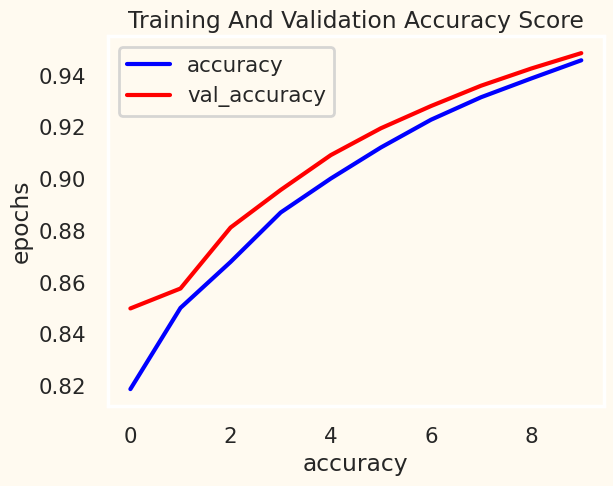

In [50]:
plt.plot(history.history['accuracy'],color = 'blue',label = 'accuracy')
plt.plot(history.history['val_accuracy'],color = 'red',label = 'val_accuracy')
plt.title("Training And Validation Accuracy Score")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

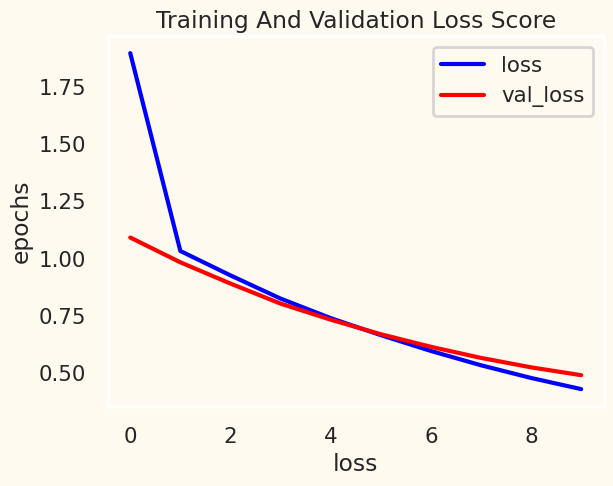

In [51]:
plt.plot(history.history['loss'],color = 'blue',label = 'loss')
plt.plot(history.history['val_loss'],color = 'red',label = 'val_loss')
plt.title("Training And Validation Loss Score")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

<a id='5.3'></a>
### **5.3. PREDICTION FROM ENCODER-DECODER MODEL**

In [52]:
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Reverse token dictionaries
rev_tok_hindi = {idx: word for word, idx in tok_hindi.word_index.items()}

# Select a subset of test data
num_samples = 10
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Map indices to tokens and remove 'start' and 'end' tokens
predicted_sentences = []
for sample in predicted_tokens_np:
    sentence = ' '.join([rev_tok_hindi.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    predicted_sentences.append(sentence)

# Reverse token dictionary for English (assuming you have `tok_english` for English tokens)
rev_tok_english = {idx: word for word, idx in tok.word_index.items()}

# Map the English test inputs to their corresponding sentences
english_sentences = []
for sample in x_test_subset:
    sentence = ' '.join([rev_tok_english.get(token, '<unknown>') for token in sample if token != 0])  # Exclude padding token
    english_sentences.append(sentence)

# Print English sentence followed by predicted Hindi sentence
for idx, (eng_sentence, hin_sentence) in enumerate(zip(english_sentences, predicted_sentences)):
    print(f'English sentence {idx + 1}: {eng_sentence}')
    print(f'Predicted Hindi translation {idx + 1}: {hin_sentence}\n')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
Shape of predictions: (10, 43, 8231)
Shape of predicted_tokens: (10, 43)
English sentence 1: we criticized them
Predicted Hindi translation 1: हमने उनकी मूल की

English sentence 2: and basit and amjad are first names
Predicted Hindi translation 2: और और पहला नाम हैं

English sentence 3: and nothing happened
Predicted Hindi translation 3: और कुछ नहीं हुआ

English sentence 4: and china was emitting 06
Predicted Hindi translation 4: और चीन

English sentence 5: in the tears in my eyes that passes
Predicted Hindi translation 5: जो समय मूल

English sentence 6: she reproached me for not answering the letter
Predicted Hindi translation 6: उसने मुझे चिट्ठी का जवाब न बनाने के लिए लिये।

English sentence 7: a man appeared at the door
Predicted Hindi translation 7: पिछले पर एक आदमी गई। दिया।

English sentence 8: i understand
Predicted Hindi translation 8: मैं हूँ।

English sentence 9: because i am john
Predicted Hindi translation 9: मैं ही हूँ

English senten

In [53]:
# Save the entire model
model.save('encoder_decoder_model.h5')
print('Model saved succesfully!')

Model saved succesfully!
